# Tie Strength exploration

In [1]:
%matplotlib inline

import os
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from feature_extract import *


In [2]:
# load data
comm_df = pickle.load(open("../data/all_contacts_final.df", "rb"))
emm_df = pickle.load(open("../data/emm_raw.df", "rb"))
with open("../data/test_comm.df", "rb") as test_f:
    test_df = pickle.load(test_f)

In [15]:
z_features = comm_feature_extract(comm_df, emm_df)
emc_all = pickle.load(open('../data/emc_all.df', 'rb'))
hash_dict = pickle.load(open('../data/emc_to_canonical.dict', 'rb'))
pr_dict = pickle.load(open('../data/pr.dict', 'rb'))
z_features = build_emc_features(z_features, comm_df, emc_all, hash_dict, pr_dict)

test_features = z_features.copy()
test_features = build_tie_str_rank(test_features, comm_df)

/mnt/c/Users/Tony Liu/Documents/Github/relationship-prediction/feature_extract/feature_extract.py:171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  group_df['mean_in'] = group_df['combined_hash'].map(mean_d)
/mnt/c/Users/Tony Liu/Documents/Github/relationship-prediction/feature_extract/feature_extract.py:172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  group_df['total_wks'] = group_df['pid'].map(wks_d)
/mnt/c/Users/Tony Liu/Documents/Github/relationship-prediction/feature_extract/feature_extract.py:187: RuntimeWarning: invalid value enco

In [16]:
emc_cols = ['q1_want', 'q2_talk', 'q3_loan', 'q4_closeness']
z_features['tie_str_score'] = z_features[emc_cols].sum(axis=1)

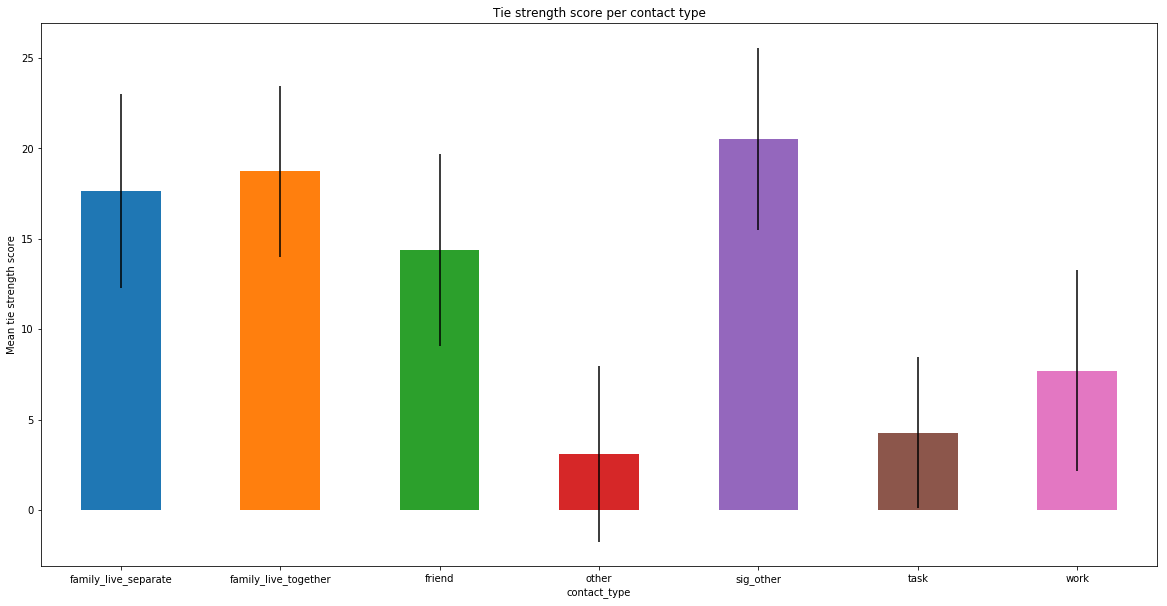

In [17]:
emc_features_mean = z_features.groupby('contact_type')['tie_str_score'].mean()
emc_features_std = z_features.groupby('contact_type')['tie_str_score'].std()
plt.rcParams["figure.figsize"] = [20,10]

emc_features_mean.plot.bar(rot=0, yerr=emc_features_std)
plt.title("Tie strength score per contact type")
plt.ylabel("Mean tie strength score")
plt.show()

In [18]:
top_count = 10
print((z_features.groupby('pid')['combined_hash'].nunique() >= top_count).sum())
contact_counts = z_features.groupby(['pid'])['combined_hash'].nunique()
drop_contacts = contact_counts.loc[(contact_counts < top_count)].index
z_features = z_features.loc[~z_features['pid'].isin(drop_contacts)]

194


In [19]:
z_features['tie_str_rank'] = z_features.groupby('pid', as_index=False)['tie_str_score'].rank("dense", ascending=False)

In [20]:
pd.set_option('display.max_rows', 500)

z_features[['pid', 'tie_str_rank', 'tie_str_score']][:100]

,pid,tie_str_rank,tie_str_score
0,1002060,14.0,0.000000
1,1002060,6.0,19.500000
2,1002060,3.0,21.600000
3,1002060,14.0,0.000000
4,1002060,10.0,15.000000
5,1002060,3.0,21.600000
6,1002060,5.0,19.666667
7,1002060,7.0,17.875000
8,1002060,12.0,5.200000
9,1002060,13.0,5.000000


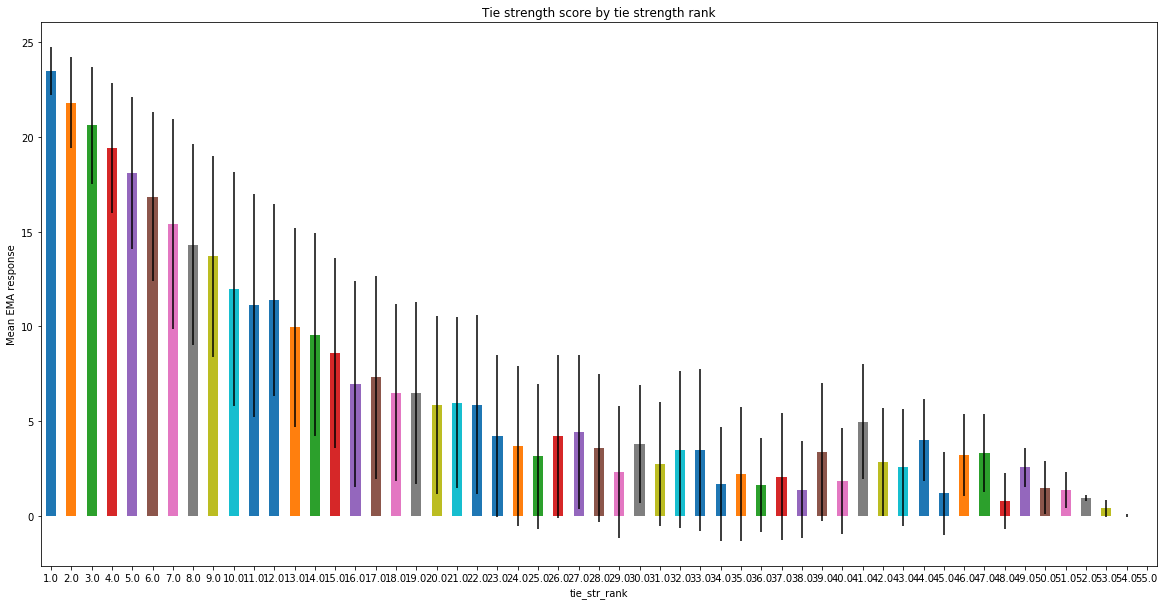

In [21]:
emc_features_mean = z_features.groupby('tie_str_rank')['tie_str_score'].mean()
emc_features_std = z_features.groupby('tie_str_rank')['tie_str_score'].std()
plt.rcParams["figure.figsize"] = [20,10]

emc_features_mean.plot.bar(rot=0, yerr=emc_features_std)
plt.title("Tie strength score by tie strength rank")
plt.ylabel("Mean EMA response")
plt.show()

In [22]:
z_features['tie_str_class'] = pd.cut(z_features['tie_str_rank'], bins=[0,5,19,np.inf], right=True, labels=False)


In [23]:
z_features[['tie_str_class', 'tie_str_rank']]

,tie_str_class,tie_str_rank
0,1,14.0
1,1,6.0
2,0,3.0
3,1,14.0
4,1,10.0
5,0,3.0
6,0,5.0
7,1,7.0
8,1,12.0
9,1,13.0


In [24]:
z_features['tie_str_class'].value_counts()

1    3789
2    3688
0    1403
Name: tie_str_class, dtype: int64

In [25]:
z_features.groupby('contact_type')['tie_str_class'].mean()

contact_type
family_live_separate    0.624590
family_live_together    0.511182
friend                  0.985574
other                   1.665104
sig_other               0.298246
task                    1.576111
work                    1.474619
Name: tie_str_class, dtype: float64

In [26]:
test_features.groupby('contact_type')['tie_str_class'].mean()

contact_type
family_live_separate    0.624590
family_live_together    0.511182
friend                  0.985574
other                   1.665104
sig_other               0.298246
task                    1.576111
work                    1.474619
Name: tie_str_class, dtype: float64

In [27]:
test_features['tie_str_class'].value_counts()

1    3789
2    3688
0    1403
Name: tie_str_class, dtype: int64